## 03 - Preparing to run fits

It can be very convenient to use the functionality of pyHXExpress in an interactive Jupyter
Notebook. Examples here will primarily take that approach. Users who want to run in a python 
console can save the code to a .py file to run from a console (this is a good appropach to 
take if you want to do some manual batch runs in parallel).<p>

The first steps are to import the libraries we will need, import the pyHXExpress program, 
and the config file. <p>

You will see as we go along, that it is sometimes convenient to set individual config settings 
to new values inside the notebook. The function hxex_reload() is a convenience function defined 
here, that will allow us to reset the settings to the value in our user_config file. 

In this example, we are going to analyaze some test set data. This data is from the Guttmann 
laboratory. They collected HDX-MS data on samples of known deuteration mixtures, so we will be 
able to compare our fit populations and Dabs values to the experimental values. <p>

The configuration parameters for this data are defined in test_config.py

In [11]:
'''
In order to import pyhxexpress and test_config from a directory different than our 
current working directory we need to add the location of those files to the system path. 
'''

import sys
sys.path.append('c:\\Users\\tuttl\\OneDrive\\Documents\\My Documents\\KlevitHahn\\hdx-ms\\pyHXExpress\\')

In [23]:
import os
import importlib
import numpy as np, pandas as pd
pd.set_option('display.max_columns',None) 
pd.set_option('display.max_colwidth', None)

import pyhxexpress as hxex
import test_config as config

def hxex_reload():
    importlib.reload(hxex)
    importlib.reload(config)
    hxex.config = config

hxex_reload()

We now have access to all of the functions and objects in the pyhxexpress.py program. 
We access these in this notebook by using the prefix 'hxex.' For example if we want to see
what all of the config variables now are, having copied them in from the test_config file, 
we can use the help(hxex.config) function.

In [24]:
help(hxex.config)

Help on module test_config:

NAME
    test_config

DATA
    Allow_Overwrite = True
    Binomial_dCorr = True
    Boot_Seed = True
    Bootstrap = True
    Data_DIR = r'C:\Users\tuttl\OneDrive\Documents\My Documents\KlevitHahn...
    Data_Type = 1
    Dfrac = 0.9
    Env_limit = 0.95
    Env_threshold = 0.1
    Full_boot = True
    Hide_Figure_Output = False
    Keep_Raw = True
    Limit_by_envelope = False
    Max_Pops = 3
    Metadf_File = 'hdxms_testsets_metadf.csv'
    Min_Pops = 1
    Nboot = 20
    Ncurve_p_accept = 0.05
    Nex_Max_Scale = 1.2
    Nterm_subtract = 1
    Output_DIR = r'C:\Users\tuttl\OneDrive\Documents\My Documents\K...ms\p...
    Overlay_replicates = True
    Peak_Resolution = 70.0
    Pop_Thresh = 0.03
    Preset_Pops = False
    Preset_Pops_File = r'C:\Users\tuttl\OneDrive\Documents\My Documents\K....
    Random_Seed = 16
    Read_Spectra_List = True
    SVG = False
    Save_Spectra = False
    Scale_Y_Values = True
    Test_Data = True
    User_mutants = ['']


If we want to change any of these values for this session, without changing the file contents
we can do so by using the variables as hxex.config.variable_name. For example if we want to 
change the minimum population threshold from 3% to 5% we do the following:

In [25]:
#hxex_reload()
print("original value:", hxex.config.Pop_Thresh)
hxex.config.Pop_Thresh = 0.05 
print("new value:",hxex.config.Pop_Thresh)


original value: 0.03
new value: 0.05


Now that all of our user settings are updated, we can find the datasets to be analyzed. 
The function 'get_metadf()' will create a dataframe with all of the file and peptide information
based on the user specified Data_DIR.

In [26]:
metadf = hxex.get_metadf()
display(metadf)

Found 17 sample types with 24 total datasets to analyze.


,file,sample,start_seq,end_seq,peptide_range,charge,peptide
0,LeuEnk_1_HI.xlsx,LeuEnk_HI,1,5,0001-0005,1,YGGFL
1,LeuEnk_1_LO.xlsx,LeuEnk_LO,1,5,0001-0005,1,YGGFL
2,Angio_2_HI.xlsx,AngioII_HI,1,8,0001-0008,2,DRVYIHPF
3,Angio_2_LO.xlsx,AngioII_LO,1,8,0001-0008,2,DRVYIHPF
4,Bradykinin_2_Lo.xlsx,Bradykinin_Lo,1,9,0001-0009,2,RPPGFSPFR
5,GluFib_2_HI.xlsx,GluFib_HI,1,14,0001-0014,2,EGVNDNEEGFFSAR
6,GluFib_2_LO.xlsx,GluFib_LO,1,14,0001-0014,2,EGVNDNEEGFFSAR
7,pep122_2_LO.xlsx,pep122_LO,1,15,0001-0015,2,VKIEPLGVAPTKAKR
8,pep122_3_LO.xlsx,pep122_LO,1,15,0001-0015,3,VKIEPLGVAPTKAKR
9,pep123_2_HI.xlsx,pep123_HI,1,15,0001-0015,2,PLGVAPTKAKRRVVQ


Sometimes we will want to run the fits on all of these found datasets. Depending on how many
datasets are found, this can take quite a long time as currently only a single cpu is used
(see advanced topics about a hacky batch run procedure. Perhaps in the future, multiprocessing
will be implemented). <p>

For this tutorial, let's limit the fit data to the Angio and GluFib high quality data. We will make 
a new 'filtered' dataframe containing only these datasets by using the utility function 'filter_df()'.

In [29]:
filtered = hxex.filter_df(metadf,samples=['GluFib_HI','AngioII_HI'],quiet=False)
display(filtered)

Dataframe filtered to 2 from 24 total entries


,file,sample,start_seq,end_seq,peptide_range,charge,peptide
2,Angio_2_HI.xlsx,AngioII_HI,1,8,0001-0008,2,DRVYIHPF
5,GluFib_2_HI.xlsx,GluFib_HI,1,14,0001-0014,2,EGVNDNEEGFFSAR


To perform the polymodal binomial fits on these datasets, we use the 'run_hdx_fits()' function. 
For each dataset in the suplied dataframe (here, 'filtered'), this function will:<br>
1. Read in the data, 
2. Pick the peaks, 
3. Iteratively fit N binomial curves, starting from N = Min_Pops and proceeding to N = Max_pops
if the p-value test is satisfied for each additional population, this becomes the 'best_n_curves'
4. Perform nboot number of unique fits using 'best_n_curves' number of populations. 
5. For every spectra, create and save 3 kinds of plots (which will display if Hide_Figure_Output = False): <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - 'IndFits': The fit raw data and resulting fit total curve
and underlying subpopulation curves as applicable. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - 'BootFits': The corrected Deuterium level (Dabs) versus 
the population.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - 'nDeutBoot': Dabs versus time for all timepoints and 
replicates for each peptide/charge. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(* versus exp# for the test sets since they are not a real timecourse)
6. Save three types of data outputs: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - 'datafits' : for each spectra, centroids, fit populations, 
and more statistics about the fit <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - 'fitparams': the fit parameters for every performed fit and statistics <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - 'metadf': an annotated version of the supplied metadf or filtered 
dataframe that summarizes what datasets were run, whether polymodal fits were found, and flags whether 
polymodal fits were found for either the UN or TD timepoints. <br>
7. If 'Save_Spectra = True', Save the full set of peak picked data and raw data each as dataframes. 

Reading in the outputs of 6 and 7 allows for generating the same outputs as during a run.

Saving config parameters to output_03Mar2024\hdxms_params_03Mar2024.py


Dataset 2 ( 1 of 2 )
Performing fits for AngioII_HI 0001-0008: DRVYIHPF z=2
Found time points (s): 0.0, 60.0, 120.0, 180.0, 240.0, 300.0, 360.0, 420.0, 480.0, 540.0, 600.0, 660.0, 720.0, 780.0, 840.0, 900.0, 960.0, 1020.0, 1080.0, 1140.0, 1200.0, 1260.0, 1000000.0
saving figure as  hxex_2_AngioII_HI_0001-0008_z2_IndFits_03Mar2024


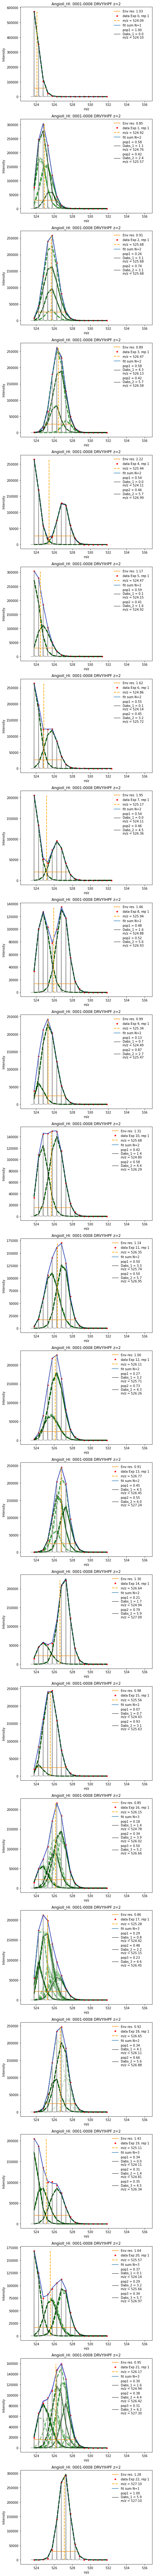

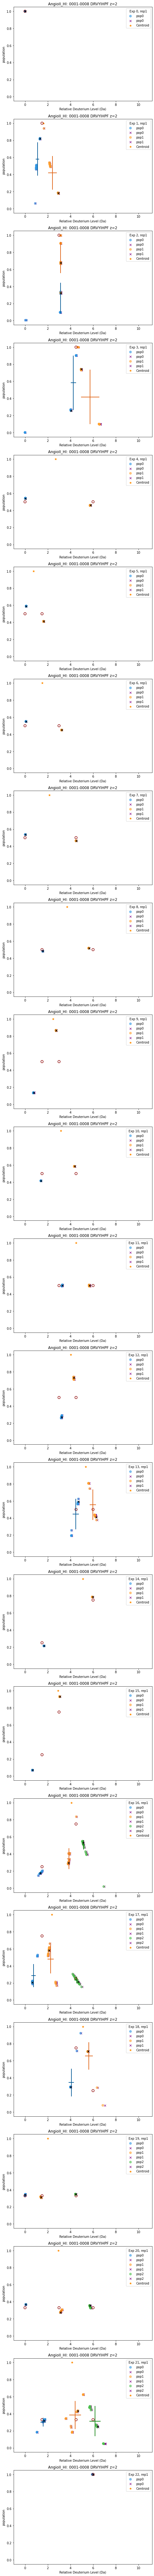

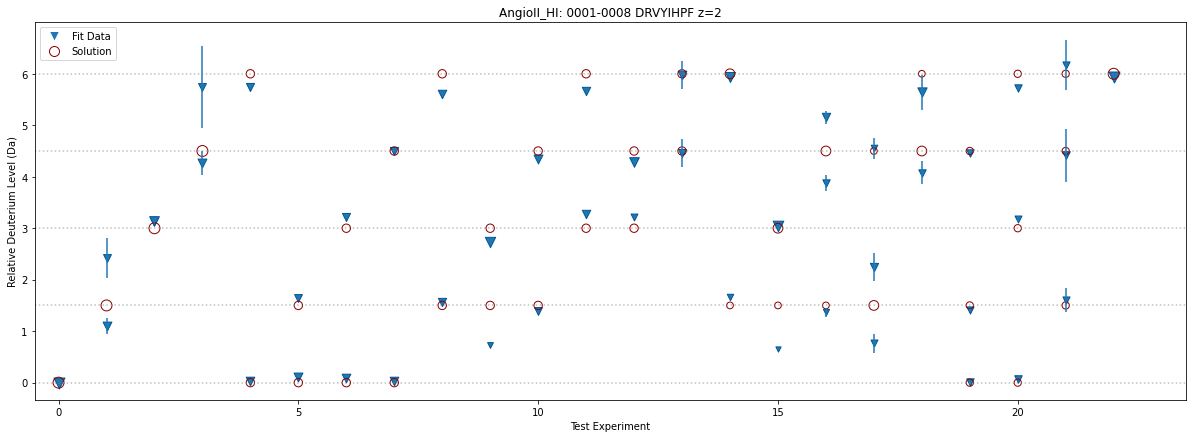

saving figure as  hxex_2_AngioII_HI_0001-0008_z2_BootFits_03Mar2024
saving figure as  hxex_2_AngioII_HI_0001-0008_z2_ndeutBoot_03Mar2024

Dataset 5 ( 2 of 2 )
Performing fits for GluFib_HI 0001-0014: EGVNDNEEGFFSAR z=2
Found time points (s): 0.0, 60.0, 120.0, 180.0, 240.0, 300.0, 360.0, 420.0, 480.0, 540.0, 600.0, 660.0, 720.0, 780.0, 840.0, 900.0, 960.0, 1020.0, 1080.0, 1140.0, 1200.0, 1260.0, 1000000.0
Time point: Exp 2 Rep: 1 Npops: 2           
min population below threshold: falling back to 1 curve(s)
Time point: Exp 5 Rep: 1 Npops: 3           
min population below threshold: falling back to 2 curve(s)
Time point: Exp 22 Rep: 1 Npops: 2           
min population below threshold: falling back to 1 curve(s)
saving figure as  hxex_5_GluFib_HI_0001-0014_z2_IndFits_03Mar2024


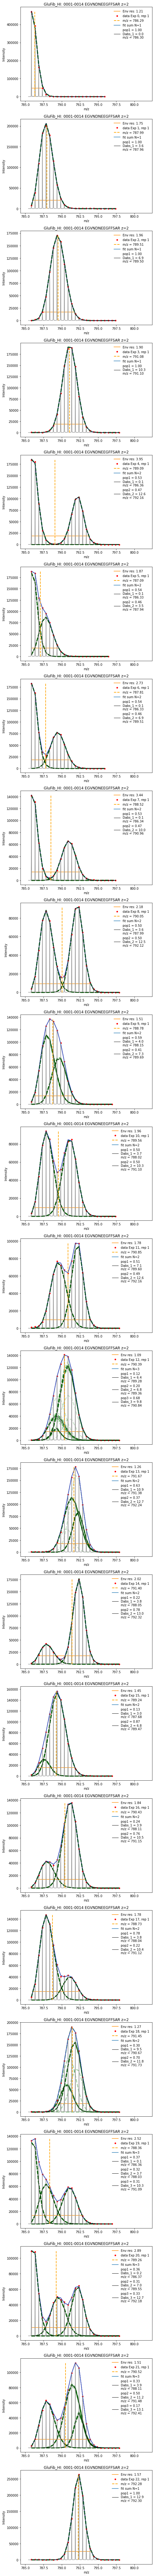

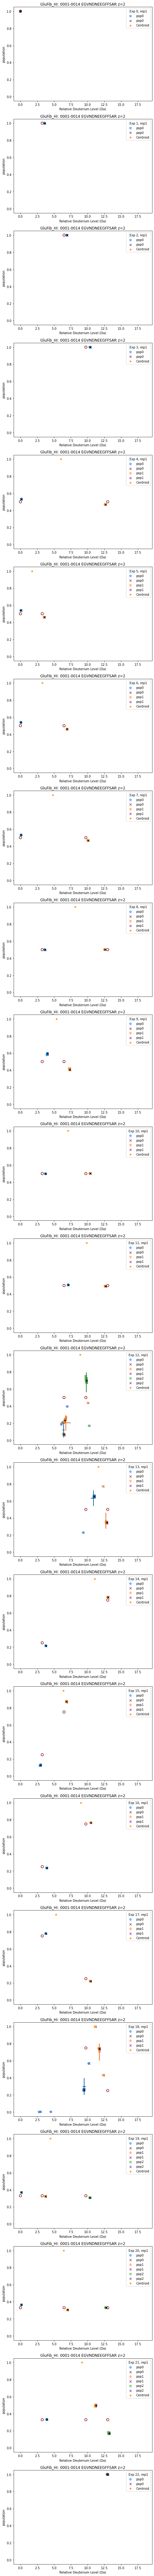

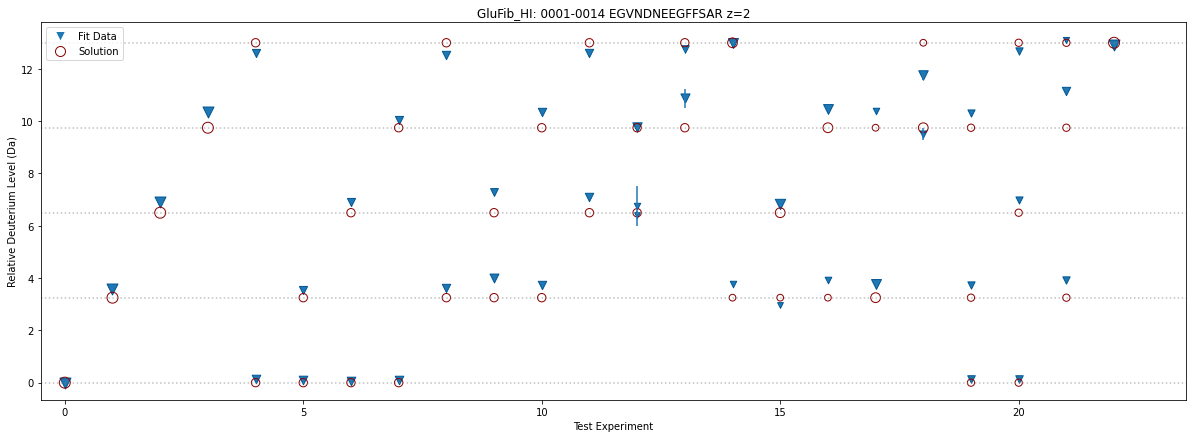

saving figure as  hxex_5_GluFib_HI_0001-0014_z2_BootFits_03Mar2024
saving figure as  hxex_5_GluFib_HI_0001-0014_z2_ndeutBoot_03Mar2024
Saving results table to C:\Users\tuttl\OneDrive\Documents\My Documents\KlevitHahn\hdx-ms\pyHXExpress\Bimodal_HDX_Data\output_03Mar2024\data_fits03Mar2024.csv


In [32]:
hxex.run_hdx_fits(filtered)